# Exploratory Data Analysis - Sampled (EDA)


# Steps taken to visualise data:

1. Choose the variables that will help predict whether an anime will have another season. The variables we chose are "Score", "Ranked", "Members", "Favorites" and "Completed".
2. For each variable, choose the most appropriate method to display the data. eg. BoxPlot, CatPlot etc



In [1]:
# Basic Libraries
import math
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

## Use file animeTV_MachineLearning.csv which contains the sampled data to combat data imbalance

In [2]:
animedata = pd.read_csv('animeTV_MachineLearning.csv')

<AxesSubplot:xlabel='HasSequel', ylabel='Score'>

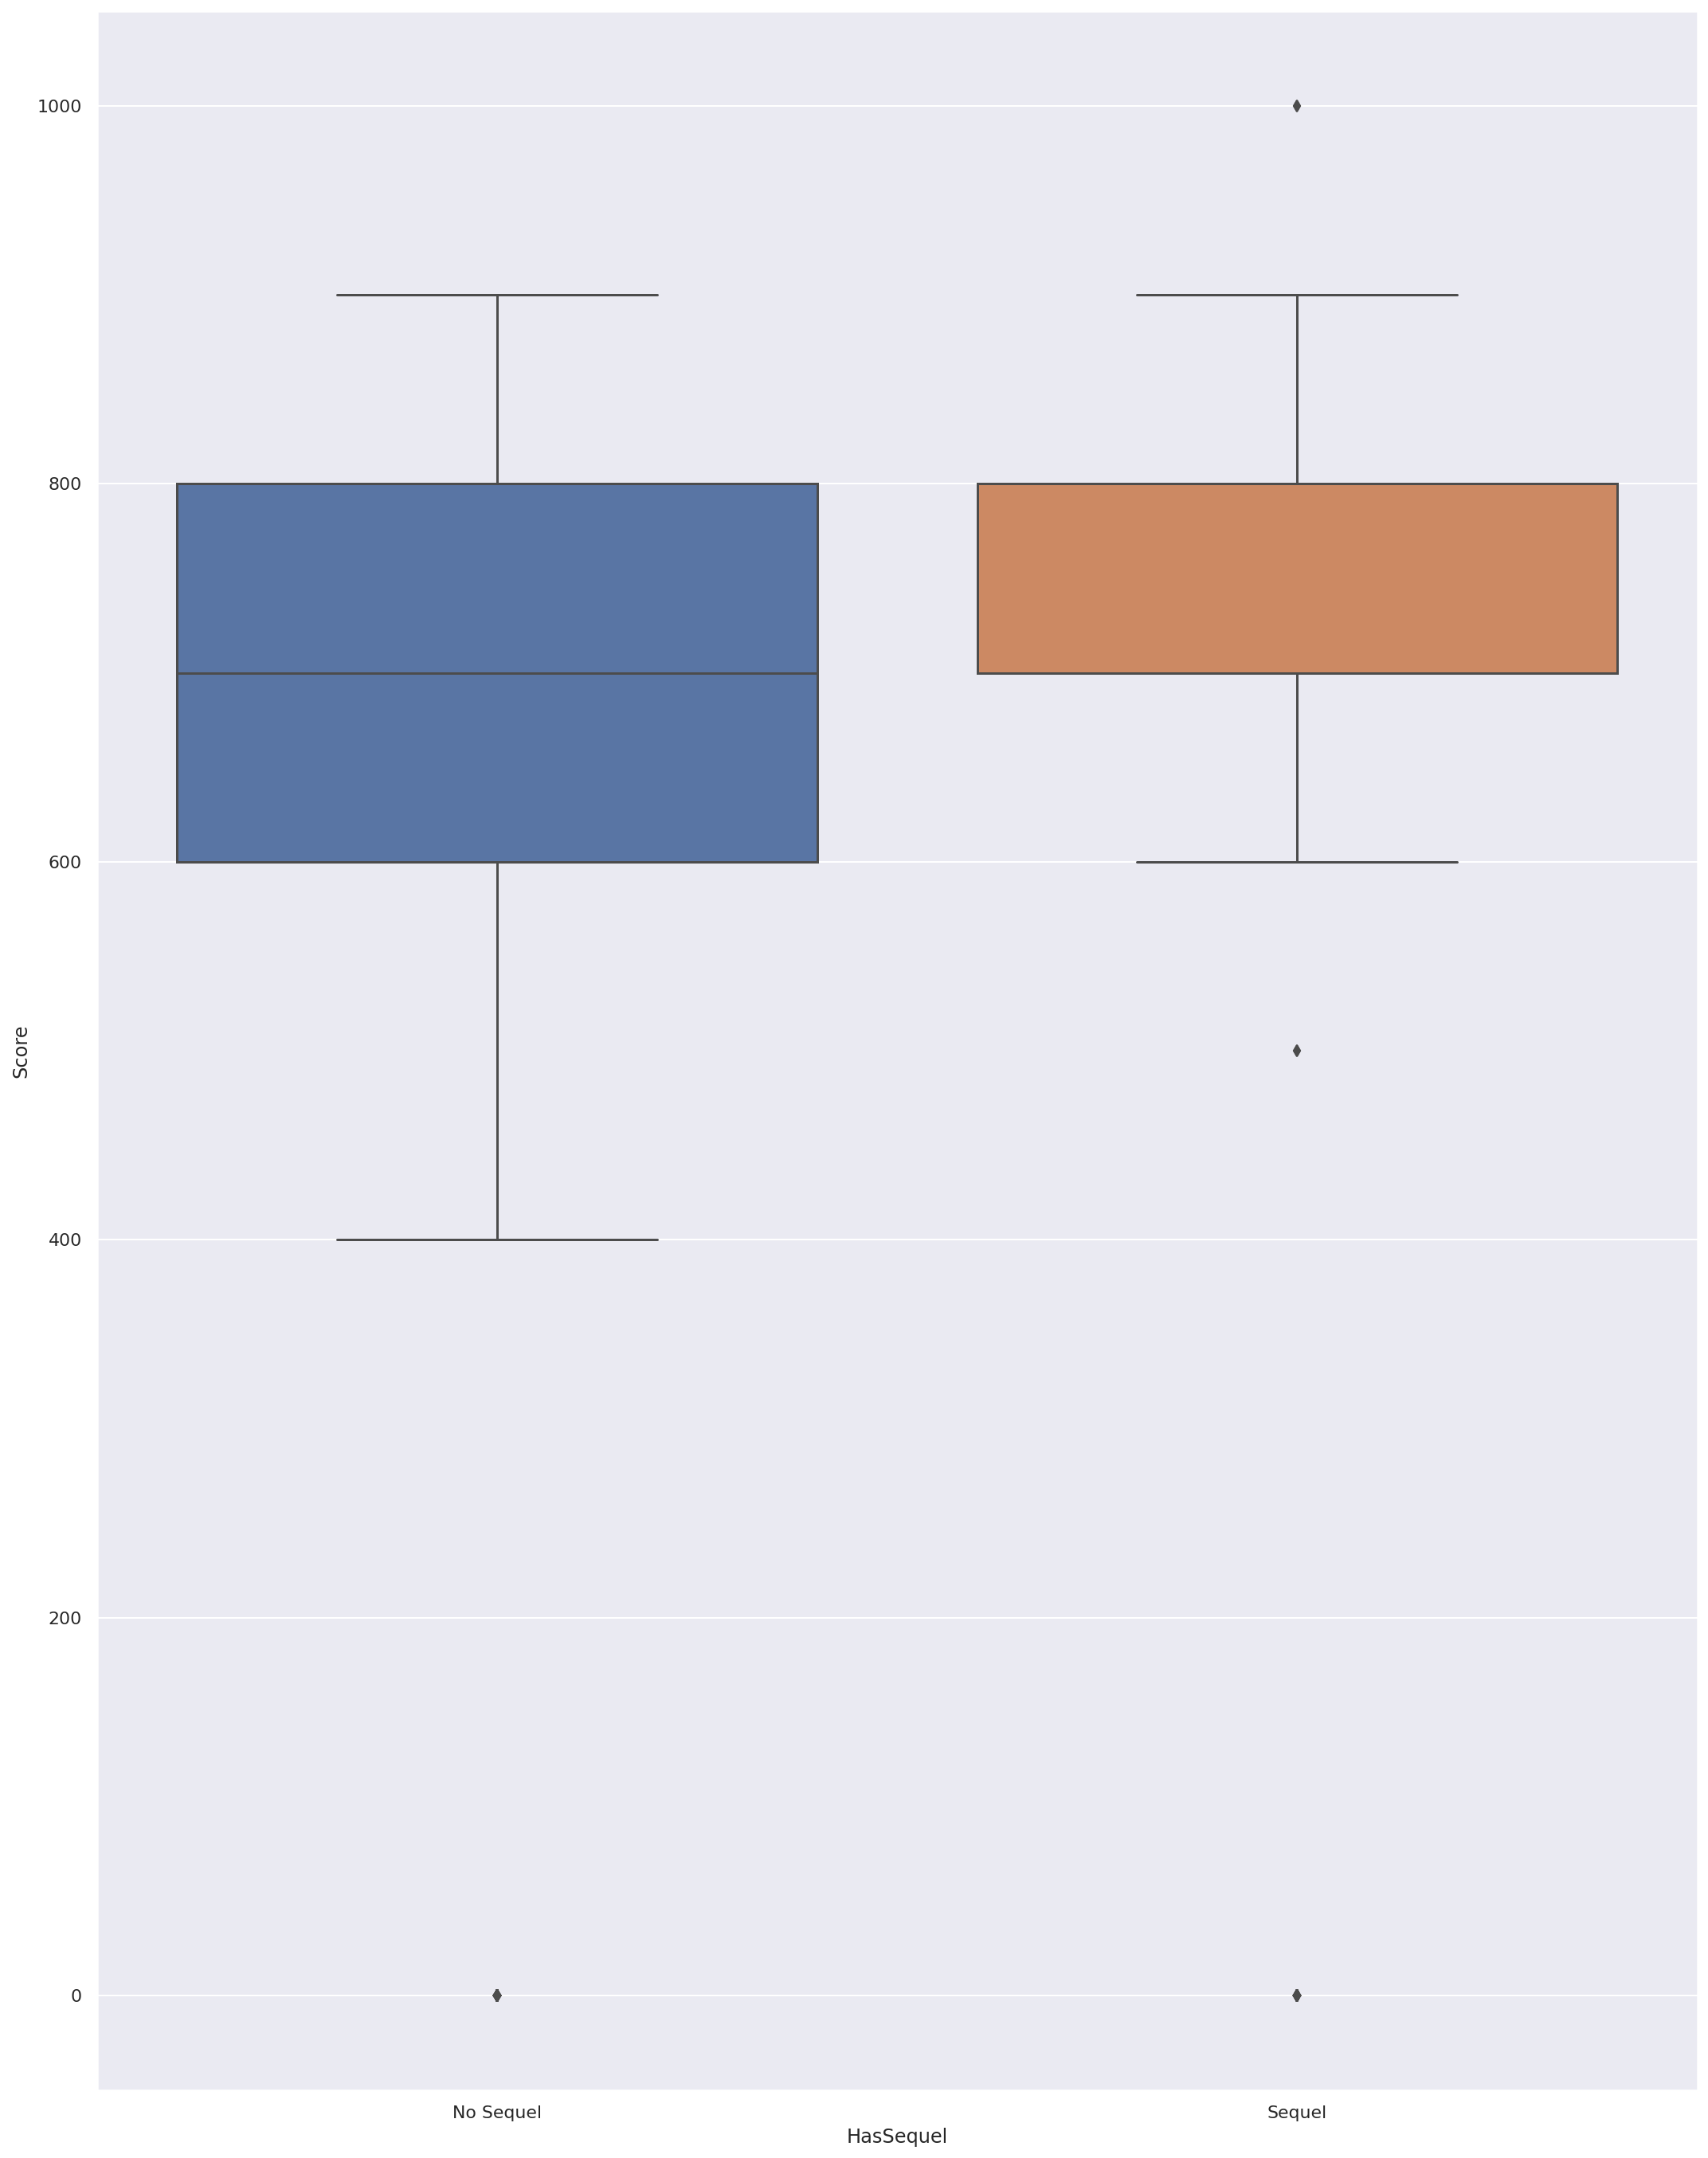

In [3]:
f, axes = plt.subplots(1, 1, figsize=(18, 24))
sb.boxplot(x = 'HasSequel', y = 'Score', data = animedata, ax = axes)

## We can tell from the figure above that animes with sequels tend to have better scores with users. This is due to the box and whisker plots being narrower and being positioned closer to the max score. It also has a lower Q1 score and a higher mean score.



<AxesSubplot:xlabel='HasSequel', ylabel='Ranked'>

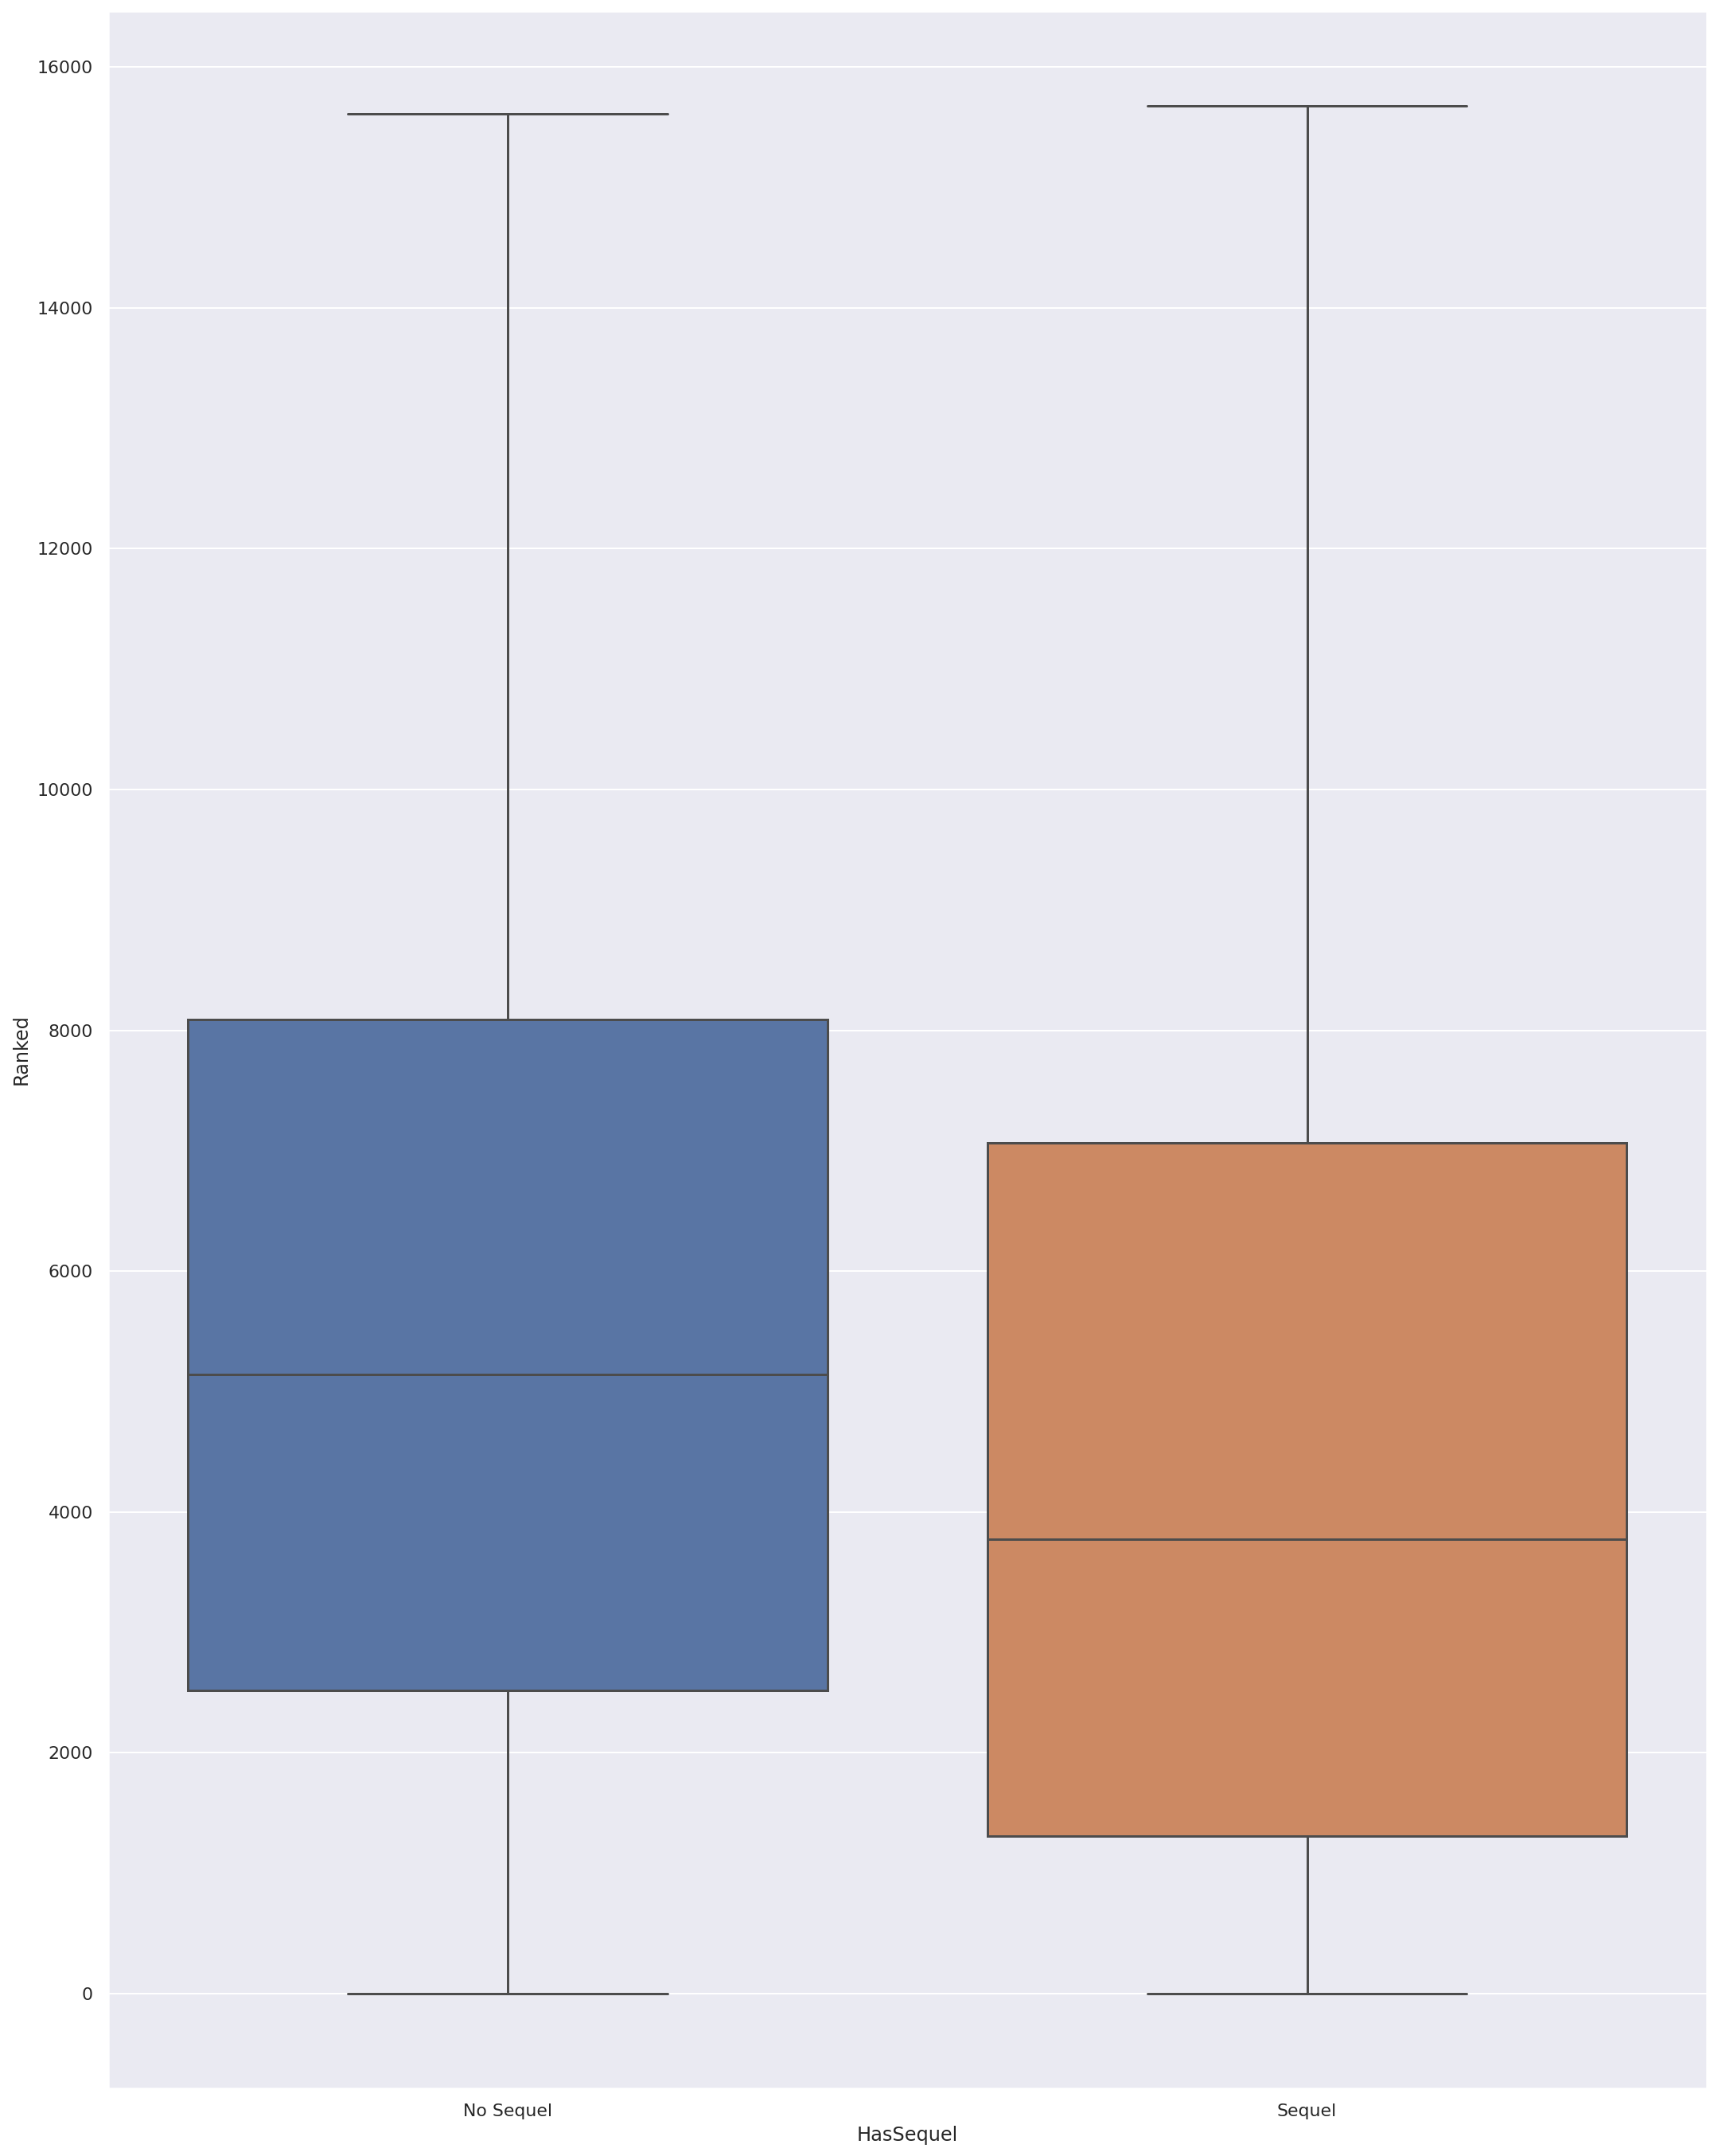

In [6]:
def haha(x):
    result = 0;
    try:
        result = float(x)
    except:
        result = 0
    return math.ceil(result)
animedata["Ranked"] = animedata["Ranked"].apply(haha)
f, axes = plt.subplots(1, 1, figsize=(18, 24))
sb.boxplot(x = 'HasSequel', y = 'Ranked', data = animedata, ax = axes)

In [7]:
def RemoveOutliers(data, col1, col2):
    dataQ1 = data[col1].quantile(0.25)
    dataQ3 = data[col1].quantile(0.75)

    data2Q1 = data[col2].quantile(0.25)
    data2Q3 = data[col2].quantile(0.75)


    ''' Detection '''
    dataIQR = dataQ3 - dataQ1
    data2IQR = data2Q3 - data2Q1

    print("Old Shape: ", data.shape)

    # Upper bound
    data1upper = np.where(data[col1] >= (dataQ3+1.5*dataIQR))
    # Lower bound
    data1lower = np.where(data[col1] <= (dataQ1-1.5*dataIQR))

    # Upper bound
    data2upper = np.where(data[col2] >= (data2Q3+1.5*data2IQR))
    # Lower bound
    data2lower = np.where(data[col2] <= (data2Q1-1.5*data2IQR))

    #Get intersection of both column outliers
    dataupper = np.intersect1d(data1upper[0], data2upper[0])
    datalower = np.intersect1d(data1lower[0], data2lower[0])

    #dataupper = pd.merge(data1upperDF, data2upperDF, how='inner')
    #datalower = pd.merge(data1lowerDF, data2lowerDF, how='inner')

    ''' Removing the Outliers '''
    data = data.drop(dataupper, inplace = False, errors='ignore')
    data = data.drop(datalower, inplace = False, errors='ignore')


    print("New Shape: ", data.shape)
    return data

In [8]:
animedata_noOutliers = RemoveOutliers(animedata, "Members", "Favorites")
print("Anime Shape: ", animedata.shape)
print("Anime Copy Shape: ", animedata_noOutliers.shape)
#RemoveOutliers(animedata, "Members", "Favorites")

Old Shape:  (913, 55)
New Shape:  (820, 55)
Anime Shape:  (913, 55)
Anime Copy Shape:  (820, 55)


<AxesSubplot:xlabel='isManga', ylabel='count'>

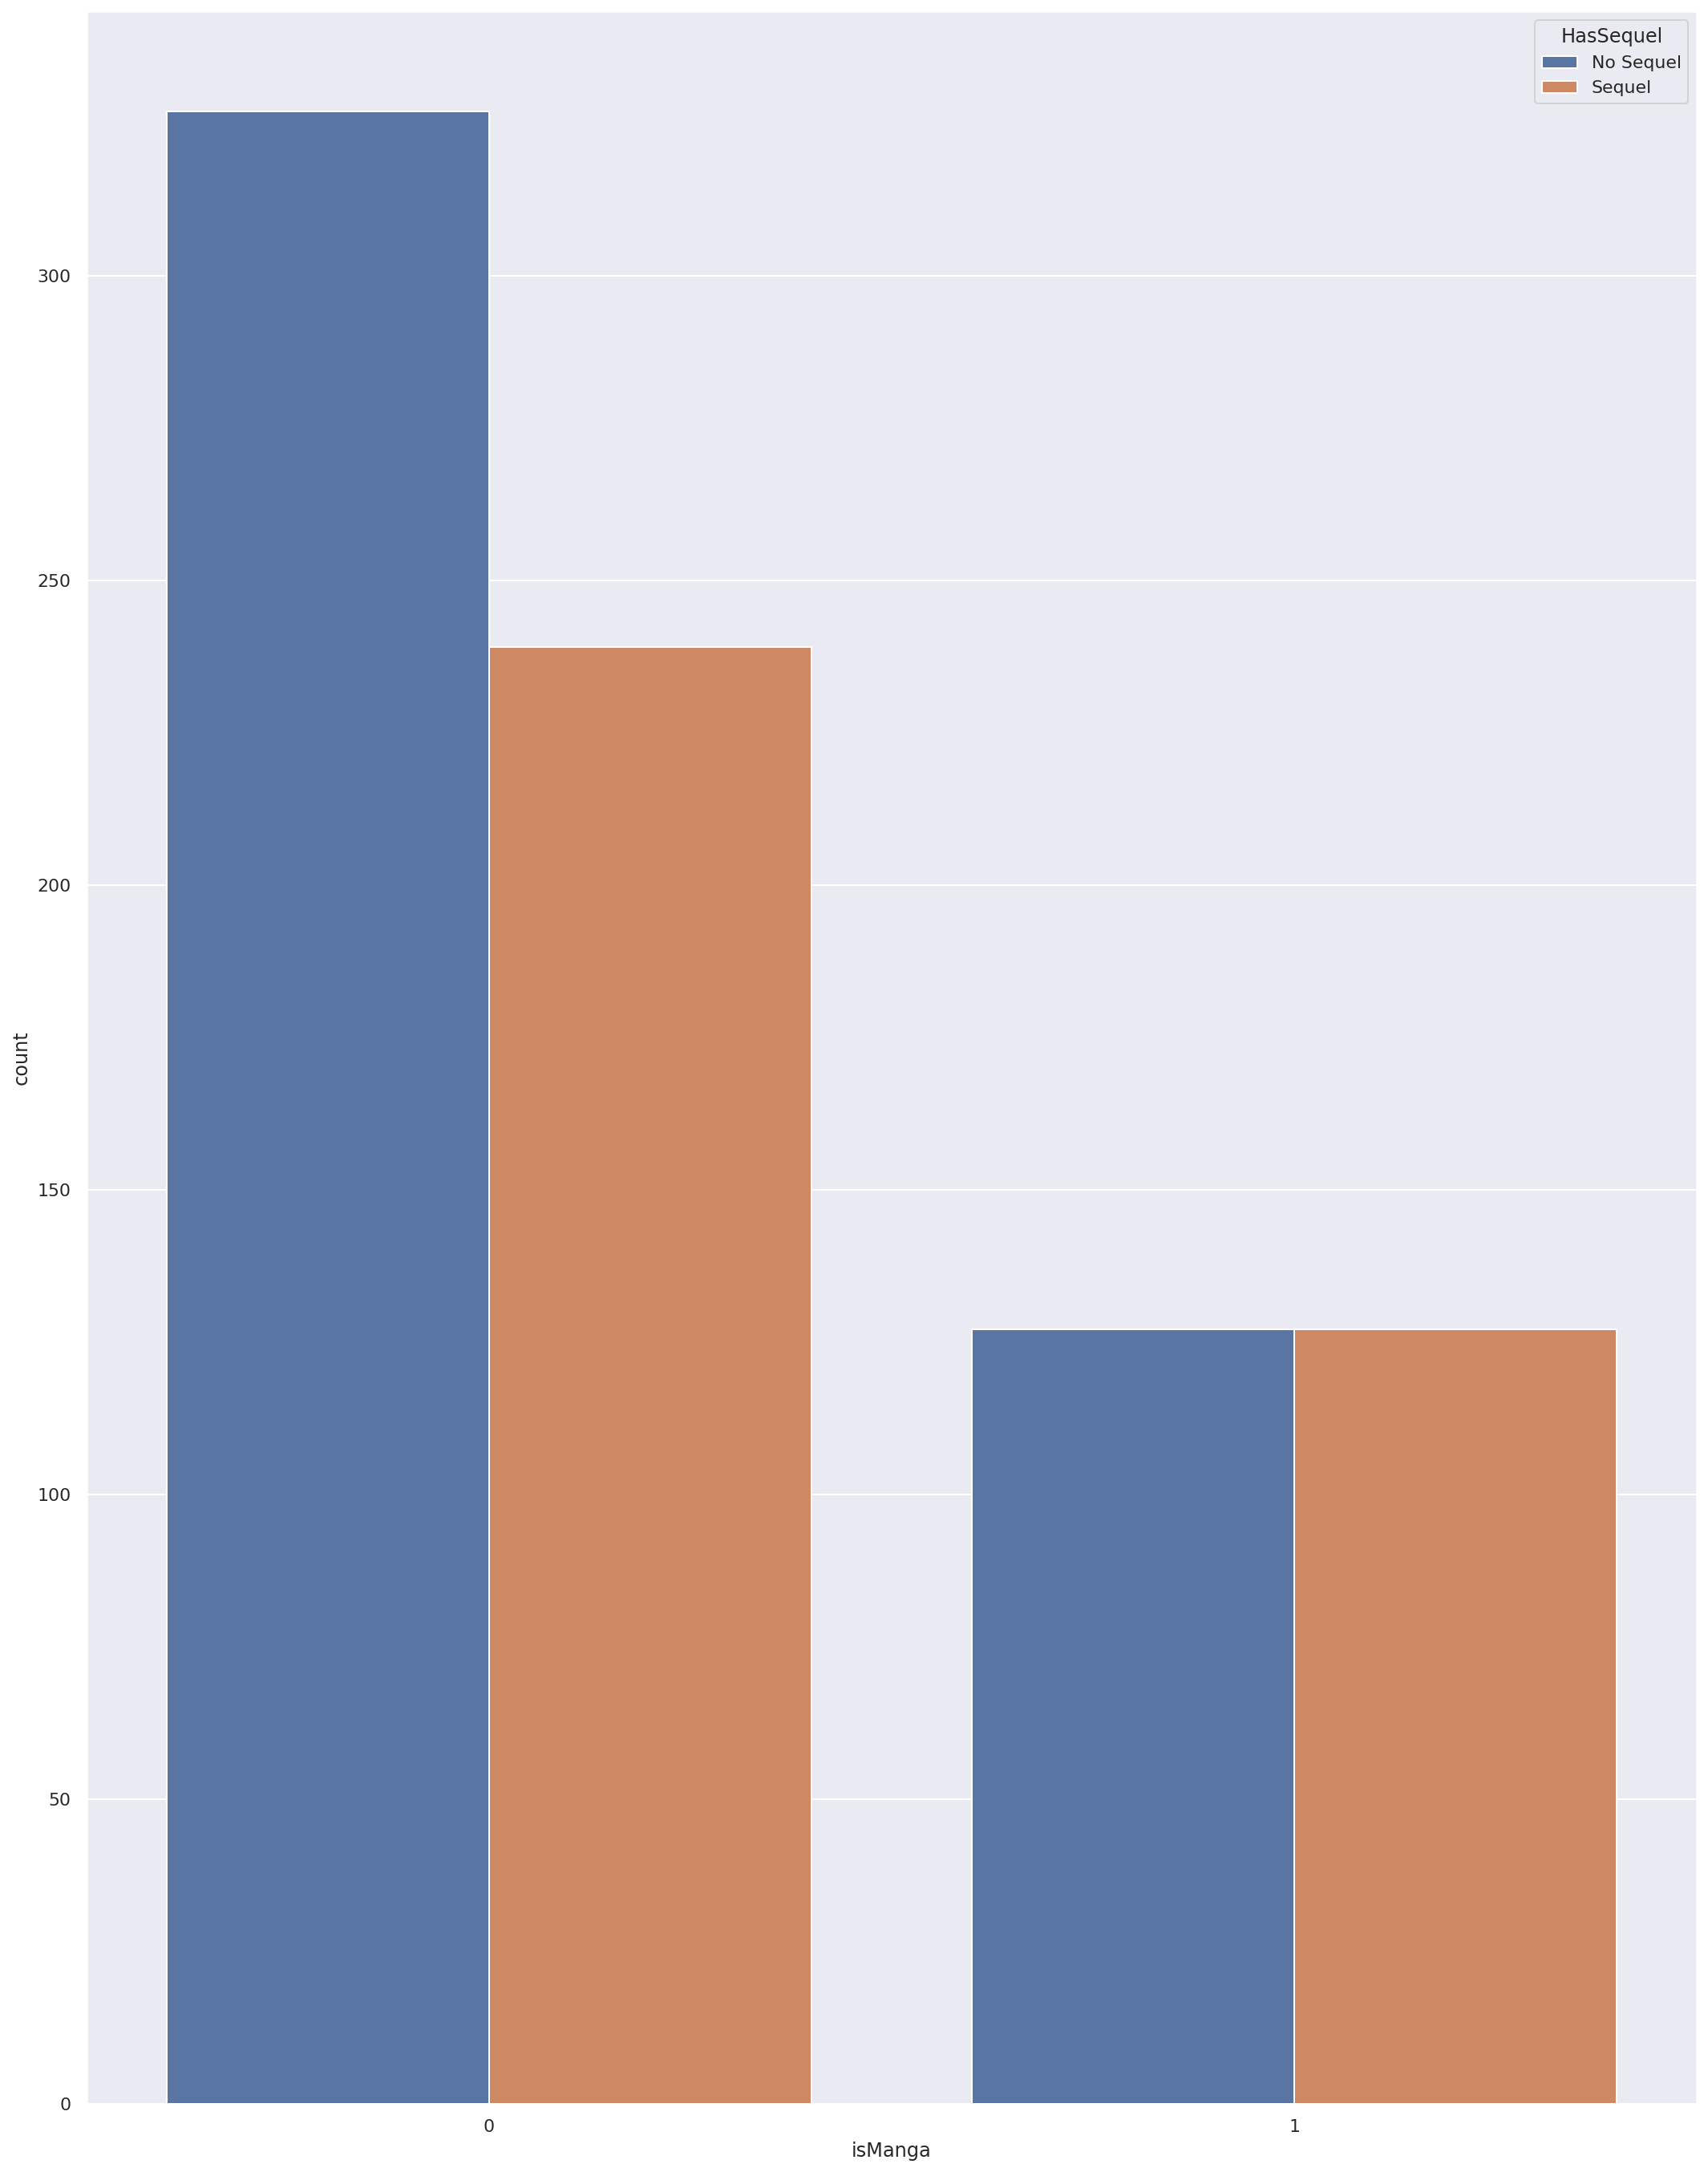

In [11]:
f, axes = plt.subplots(1, 1, figsize=(18, 24))
sb.countplot(x="isManga", hue="HasSequel", data=animedata_noOutliers)